## Central Limit Theorem

The Central Limit Theorem (CLT) is a fundamental concept in statistics that states that, given a sufficiently large sample size, the sampling distribution of the sample mean will be approximately normally distributed, regardless of the original population's distribution

In [739]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats 

# Set the random seed for reproducibility
np.random.seed(42)

In [740]:
# Generate two different normal distributions

data1 = np.random.normal(loc=5, scale=1, size=500)  
data2 = np.random.normal(loc=10, scale=1, size=500)

# Combine the two datasets
bimodal_data = np.concatenate([data1, data2])

<Axes: ylabel='Density'>

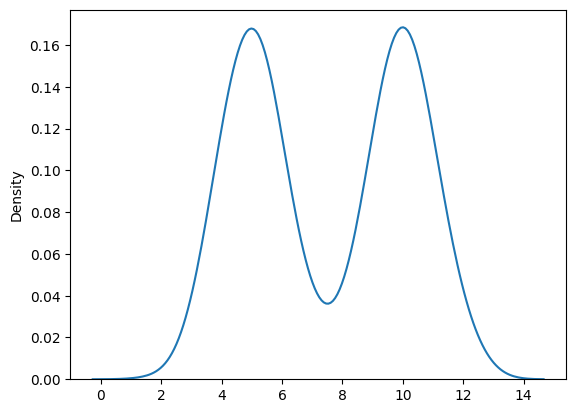

In [741]:
sns.kdeplot(bimodal_data)

# Sampling

In [742]:
# sample mean 

sample_30 = np.random.choice(bimodal_data,100)

sample_30.mean()


np.float64(7.480128119024034)

## Creating a Sampling Distribution of Sample Means

In [743]:
# calculate sample_means
sample_means = []
for i in range(100):
    sample_30 = np.random.choice(bimodal_data,30)
    sample_means.append(sample_30.mean())


sample_means

[np.float64(7.979811584899376),
 np.float64(7.850729363503006),
 np.float64(6.934112687261873),
 np.float64(8.00857124518813),
 np.float64(7.167556971750639),
 np.float64(6.675469111295291),
 np.float64(7.101633947281315),
 np.float64(8.209079762100695),
 np.float64(7.2687005513992515),
 np.float64(7.796520924244354),
 np.float64(6.999512464882569),
 np.float64(7.725204866530107),
 np.float64(6.971946438252185),
 np.float64(7.934993902537541),
 np.float64(7.79770644782736),
 np.float64(7.986059852366624),
 np.float64(8.431533944272866),
 np.float64(7.086930768342729),
 np.float64(7.906912653740293),
 np.float64(7.362508421735059),
 np.float64(7.014154064112154),
 np.float64(7.773945584682281),
 np.float64(7.194183740383115),
 np.float64(7.799652252370675),
 np.float64(6.787881632544398),
 np.float64(7.366665386585917),
 np.float64(7.508326939214081),
 np.float64(7.811429082231851),
 np.float64(8.055683784034953),
 np.float64(6.312700675143153),
 np.float64(7.60312572159653),
 np.float6

## Plotting

<Axes: ylabel='Density'>

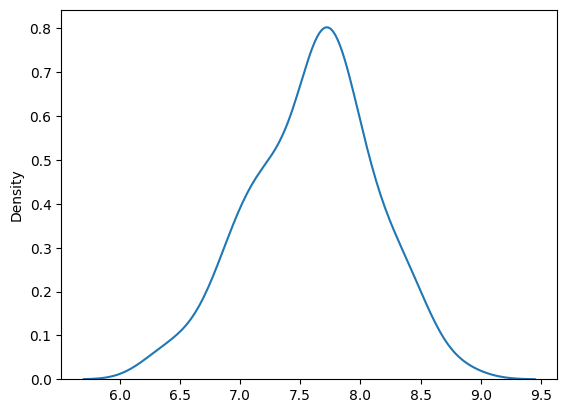

In [744]:
sns.kdeplot(sample_means)

Another handy feature of the Central Limit Theorem is that the mean and standard deviation of the sampling distribution should also approximate the population mean and standard deviation from the original non-normal dataset!

## The standard error (SE)

The standard error (SE) is a measure of the variability or dispersion of a sample mean estimate relative to the true population mean. It quantifies how much the sample mean is expected to fluctuate from the true population mean due to sampling variability.

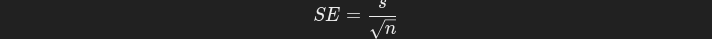

Formula for Standard Error

The standard error of the sample mean is calculated using the formula:

Where:

    s = standard deviation of the sample
    n = number of observations in the sample

In [745]:
# e.g with a population size of 50
sample_50 =  np.random.choice(bimodal_data,50)

sample_50.mean()

np.float64(7.734516160194687)

In [746]:
# population mean
bimodal_data.mean()

np.float64(7.519332055822325)

In [747]:
# stardard error 
SE = sample_50.std()/np.sqrt(len(sample_50))
SE


np.float64(0.3563295361827712)

In [748]:
sample_50.mean()- SE

np.float64(7.378186624011915)

# Confidence Interval
## What is a Confidence Interval

A Confidence Interval is a range of values above and below the point estimate that captures the true population parameter at some predetermined confidence level. If we want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, we would set the confidence level to 95%. Higher confidence levels result in wider confidence intervals.

Steps to Calculate Confidence Intervals

    Determine Your Sample Statistics:
        Sample Mean (xˉ): Calculate the mean of your sample data.
        Population Standard Deviation (σ): This is given as known.

    Choose a Confidence Level:
        Common confidence levels are 90%, 95%, and 99%. Each confidence level corresponds to a z-score from the standard normal distribution (Z-distribution).

    Find the Z-Score:
        Use a z-table or standard normal distribution calculator to find the z-score that corresponds to your chosen confidence level.

    Calculate the Standard Error (SE):
    SE=σ/√n

​σ​

Where:

    σ = population standard deviation
    n = sample size

Calculate the Confidence Interval: Using the formula:

    CI=xˉ±z∗⋅SE

We calculate a confidence interval by taking a point estimate and then adding and subtracting a margin of error to create a range. The margin of error is based on your desired confidence level, the spread of the data and the size of your sample. The way you calculate the margin of error depends on whether you know the standard deviation of the population or not.

The margin of error for a known population standard deviation is:

    Margin of Error = z ∗ σ / √n

Where σ (sigma) is the population standard deviation, n is sample size, and z is a number known as the z-critical value.

In [749]:
#calculate the sample mean
sample_mean = sample_50.mean()
sample_mean


np.float64(7.734516160194687)

In [750]:
# find the critical z value
z = stats.norm.ppf(0.95)
z


np.float64(1.6448536269514722)

In [751]:
# ppulation std
std = bimodal_data.std()
std

np.float64(2.6963633464167818)

In [752]:
# get the stardard error 

SE = std/np.sqrt(len(sample_50))
SE

np.float64(0.38132336135883166)

In [753]:
# calculate the margin of error
ME = z*SE
ME

np.float64(0.6272211139724011)

In [754]:
# calculate the confidence interval
CI = (sample_50.mean()-ME,sample_50.mean()+ME)
CI

(np.float64(7.107295046222286), np.float64(8.361737274167089))

In [755]:
# check the population mean
bimodal_data.mean()


np.float64(7.519332055822325)

# With Libraries

In [756]:
stats.norm.interval(confidence = 0.95,                         # Confidence level
                 loc = sample_50.mean(),                       # Sample mean
                 scale = SE)                                   # stardard error

(np.float64(6.987136105467624), np.float64(8.48189621492175))

Confidence intervals make a statement of probability about the confidence interval range that could contain the true value.

## Confidence Intervals for a T Distribution 


The t-distribution, also known as Student's t-distribution, is a probability distribution that is used in statistics, particularly when dealing with small sample sizes or when the population standard deviation is unknown.

Calculate a Confidence Interval for the Mean:

    Determine the Point Estimate: Calculate the sample mean (xˉ).

    Select the Confidence Level: Decide on your desired confidence level (commonly 95%).

    Find the Critical Value:
        For a normal distribution, use the z-score for the desired confidence level.
        For smaller samples or unknown population standard deviation, use the t-score.

    Calculate the Standard Error (SE):
    SE= s / √n


where s is the sample standard deviation and n is the sample size.

    Calculate the Margin of Error (ME):
    ME=Critical Value×SE

Construct the Confidence Interval:

    Confidence Interval=(xˉ−ME,xˉ+ME)

In [758]:
#calculate the sample mean
sample_30 = np.random.choice(30)
np.mean(sample_30)


np.float64(21.0)

In [732]:
# get the t value
t = stats.t.ppf(0.95,(len(sample_50)-1))
t


np.float64(1.6765508926168537)

In [733]:
# get the SE
SE = sample_50.std()/np.sqrt(len(sample_50))
SE


np.float64(0.3563295361827712)

In [734]:
ME = t*SE
ME

np.float64(0.5974046019529745)

In [735]:
# calculate the confidence intervals

CI= (sample_50.mean()-ME,sample_50.mean() + ME)
CI

(np.float64(7.137111558241712), np.float64(8.33192076214766))

In [736]:
# check the population mean
bimodal_data.mean()

np.float64(7.519332055822325)

# Calculating Confidence intervals using libraries

In [737]:
stats.t.interval(confidence = 0.95,                         # Confidence level
                 df= len(sample_50)-1,                      # Degrees of freedom
                 loc = sample_50.mean(),                    # Sample mean
                 scale = SE)                                # Estimated standard error of the mean


(np.float64(7.018445148024043), np.float64(8.450587172365331))